In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
from sklearn.datasets import make_blobs

In [128]:
X,y = make_blobs(
                    n_samples=300,
                    n_features=2,
                    centers = 3,
                    cluster_std = 3,
                    shuffle = True
)

In [129]:
X.shape,y.shape

((300, 2), (300,))

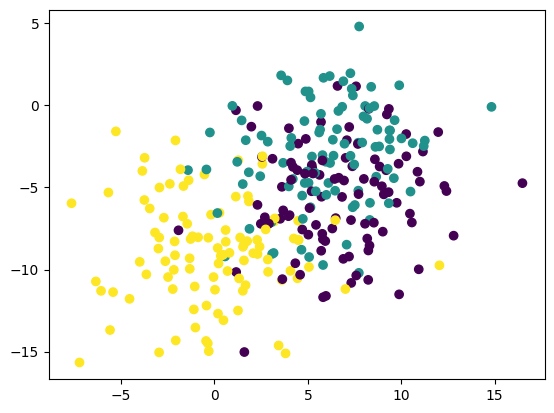

In [130]:
plt.scatter(
    x = X[:,0], # Always the X1
    y = X[:,1], # Always the X2
    c = y # The predicted value 
)

In [131]:
from sklearn.cluster import AgglomerativeClustering

In [132]:
aglc = AgglomerativeClustering(
    linkage = 'ward',
    n_clusters = 3
)

In [133]:
y_pred = aglc.fit_predict(X)

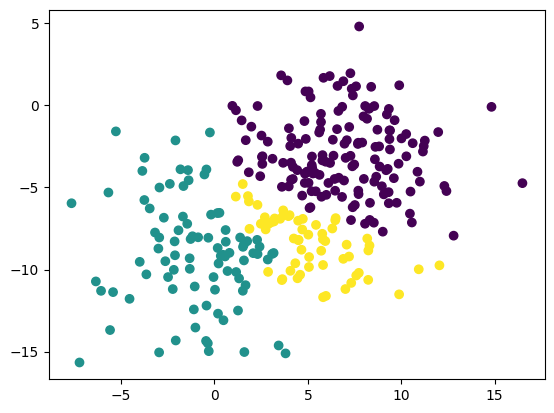

In [134]:
plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y_pred
)

In [135]:
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [136]:
silhouette_score(X,y_pred) # It measures "fit."

0.3071826601050587

In [137]:
davies_bouldin_score(X,y_pred) # It measures "separation."

0.9996466637835087

In [138]:
import scipy.cluster.hierarchy as sch

In [139]:
Z = sch.linkage(
    X,
    method = 'ward'
)

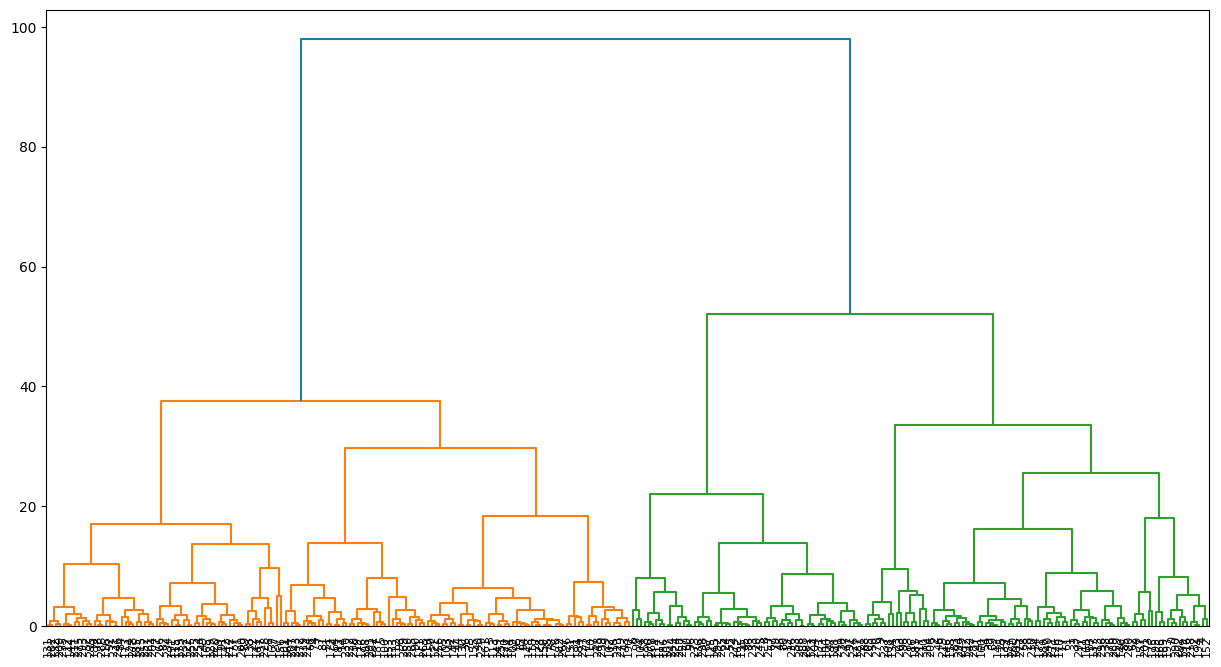

In [140]:
plt.figure(figsize=(15,8))
sch.dendrogram(
    Z,
    leaf_font_size=8,
    leaf_rotation=90.,
    # truncate_mode = 'lastp'
)
plt.show()

Clusters : 2 		 Silhouette score 0.5778562561540661 		  Davies-Bouldin Index 0.5902588623399077


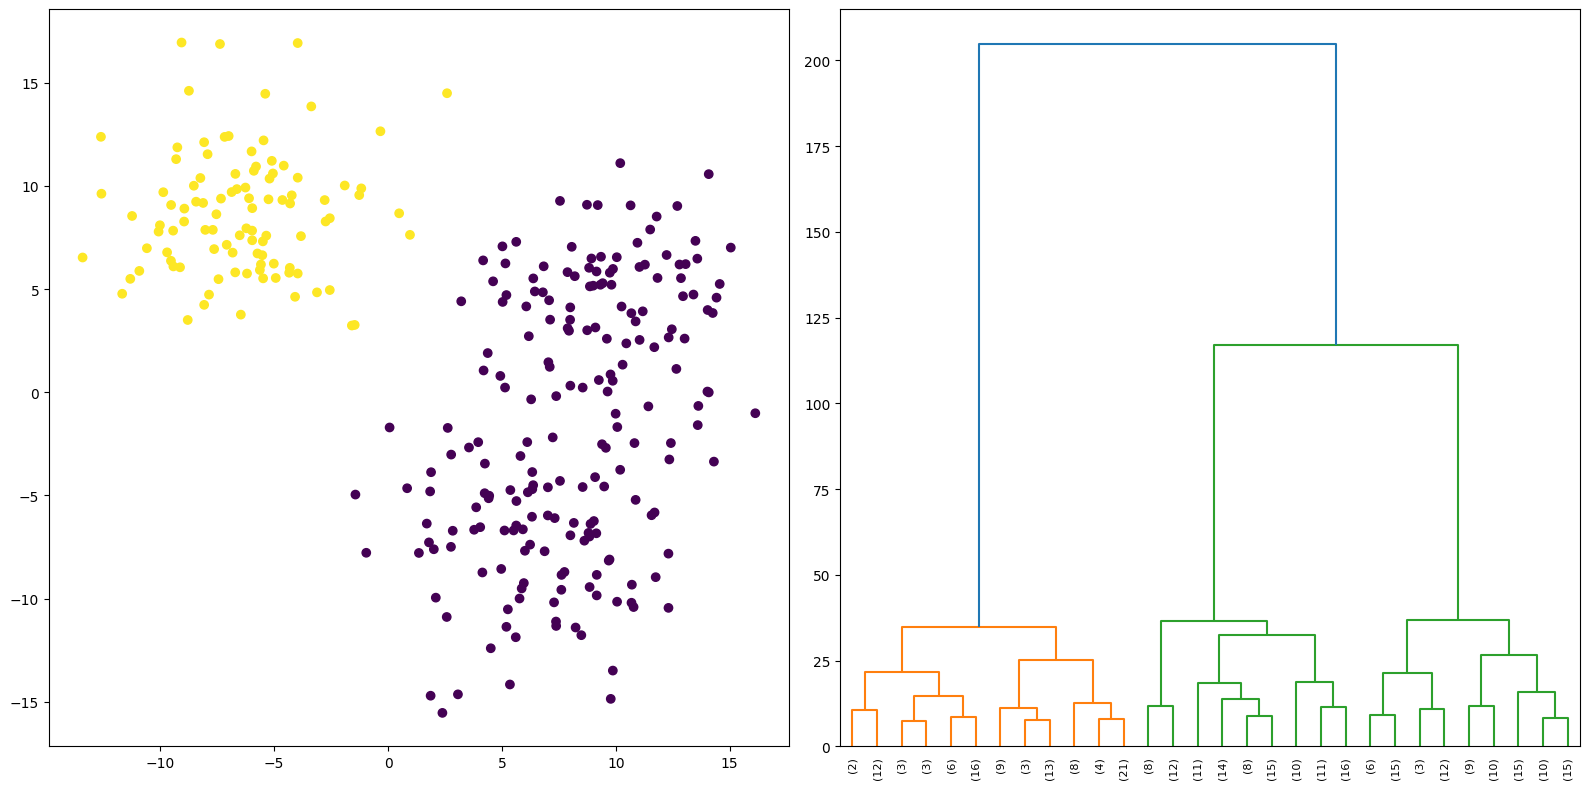

Clusters : 3 		 Silhouette score 0.5806863143038772 		  Davies-Bouldin Index 0.6059256314476084


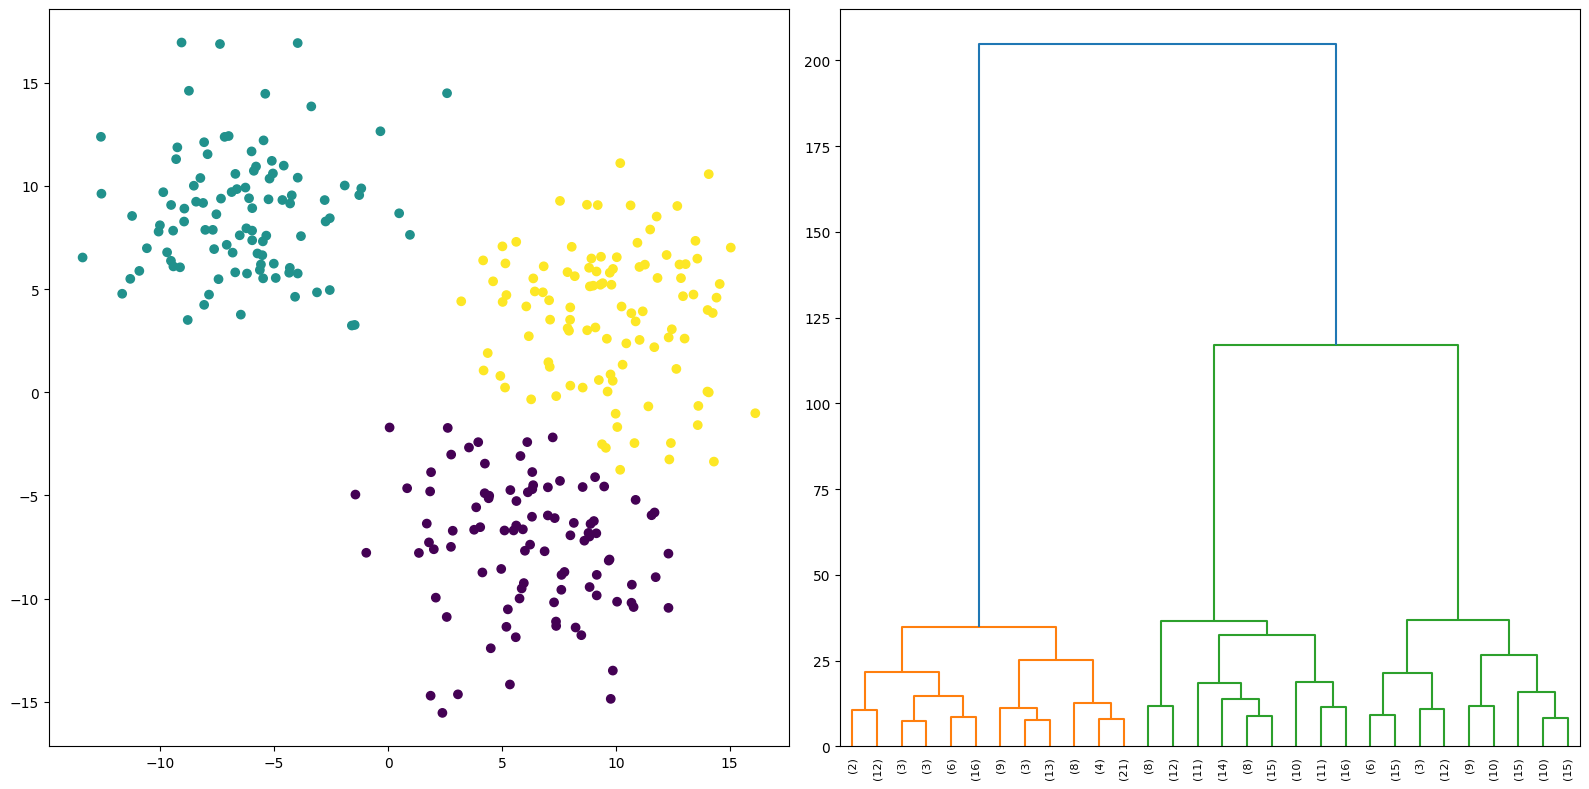

Clusters : 4 		 Silhouette score 0.4924129184866473 		  Davies-Bouldin Index 0.8466716249298765


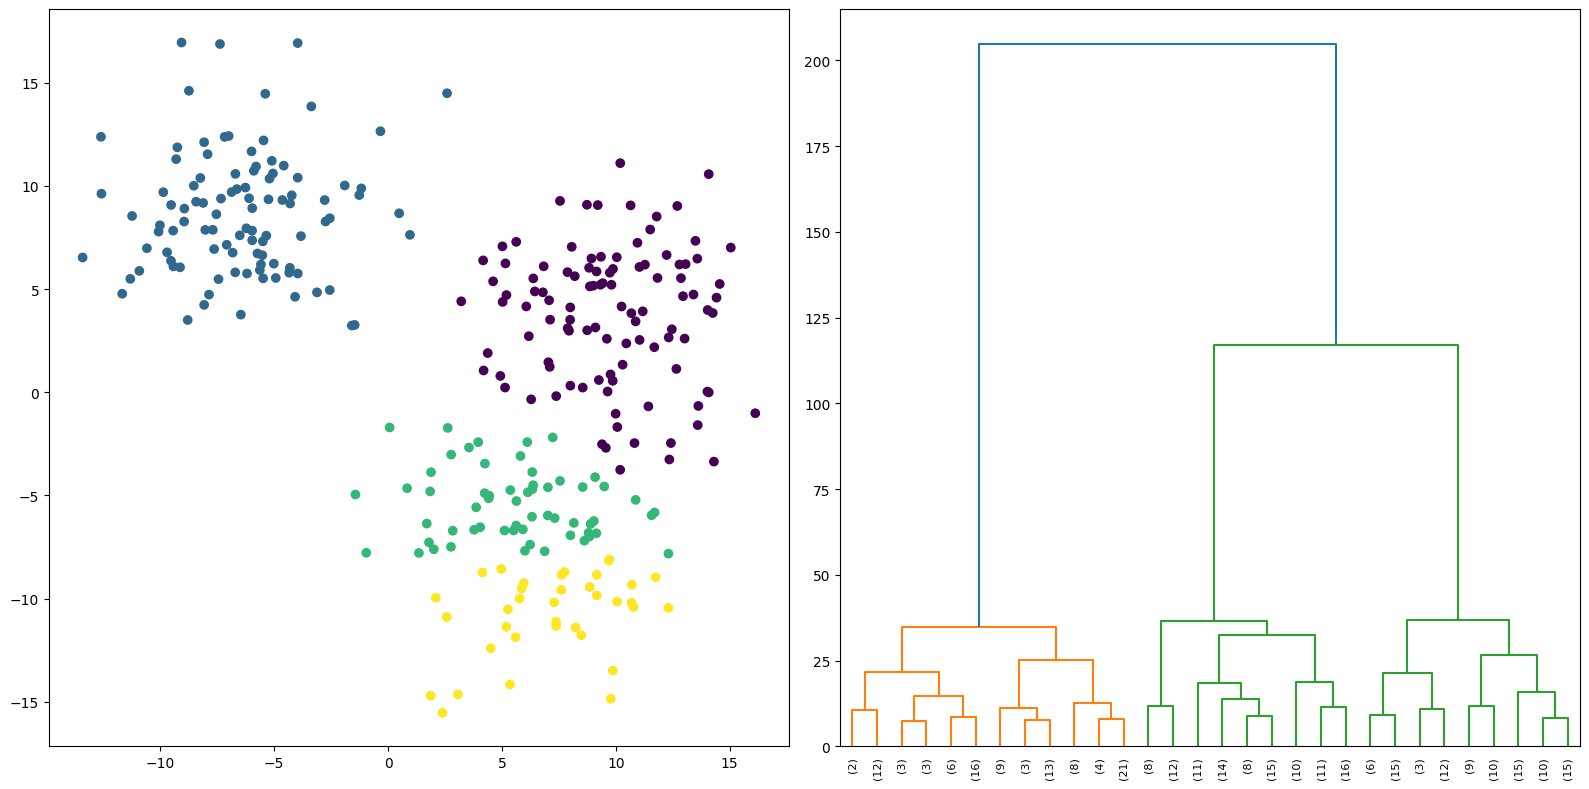

Clusters : 5 		 Silhouette score 0.4397392366681178 		  Davies-Bouldin Index 0.8967475973062566


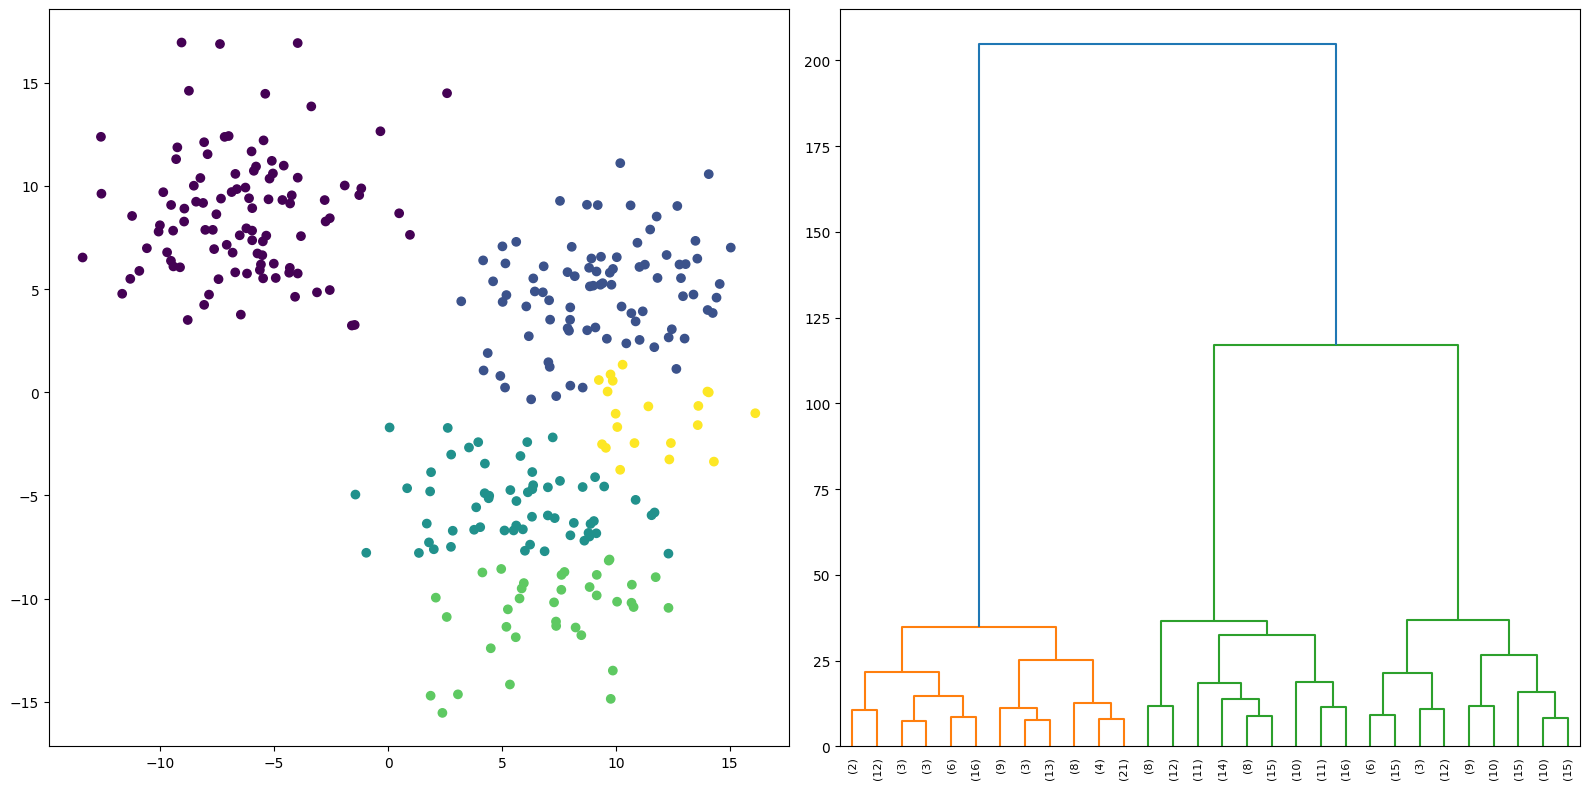

Clusters : 6 		 Silhouette score 0.3247822642534842 		  Davies-Bouldin Index 1.071260128554796


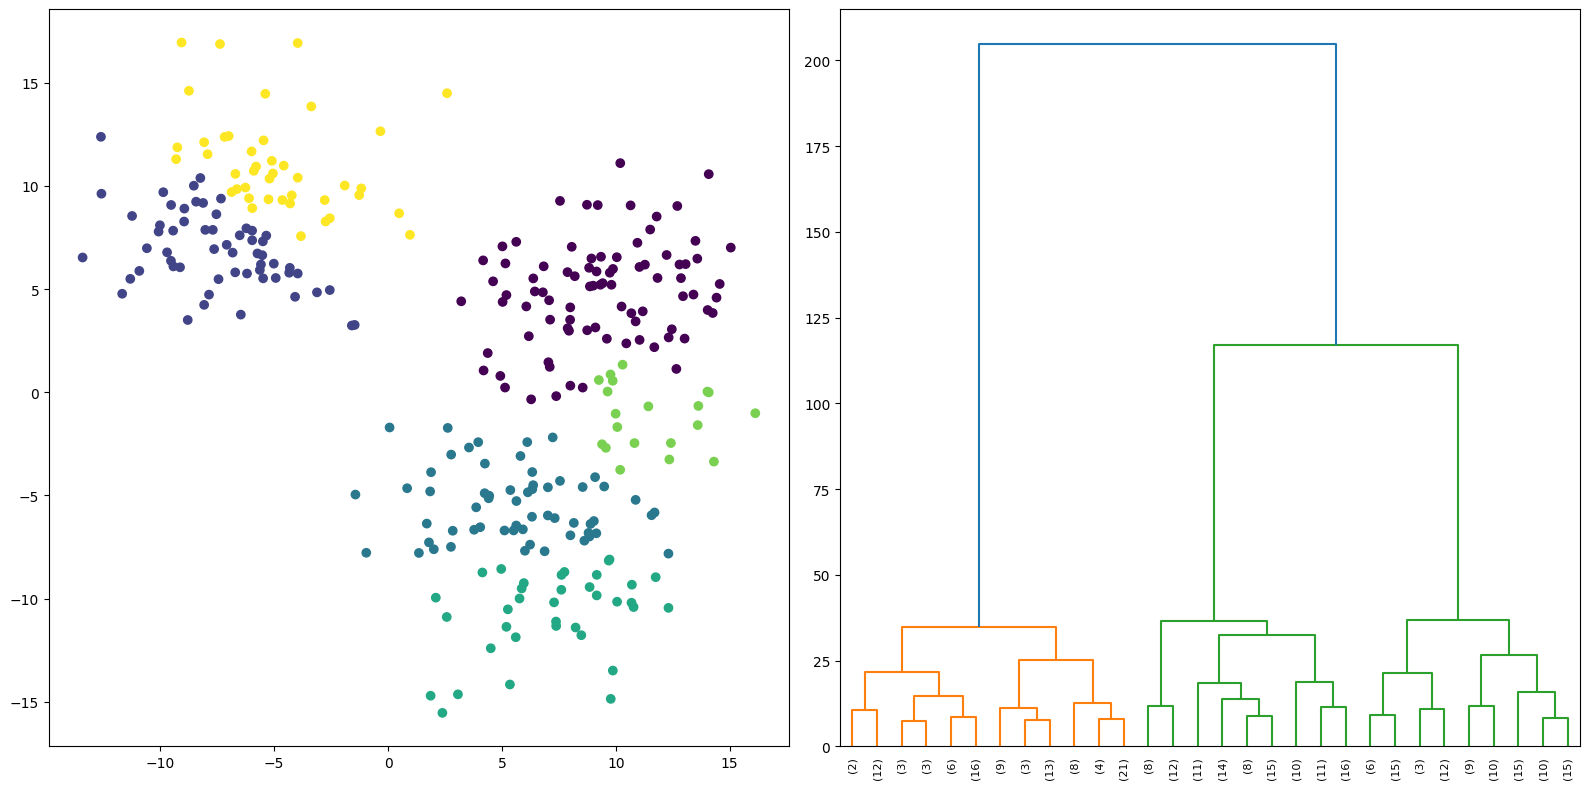

Clusters : 7 		 Silhouette score 0.32214166588466703 		  Davies-Bouldin Index 1.0676792564211683


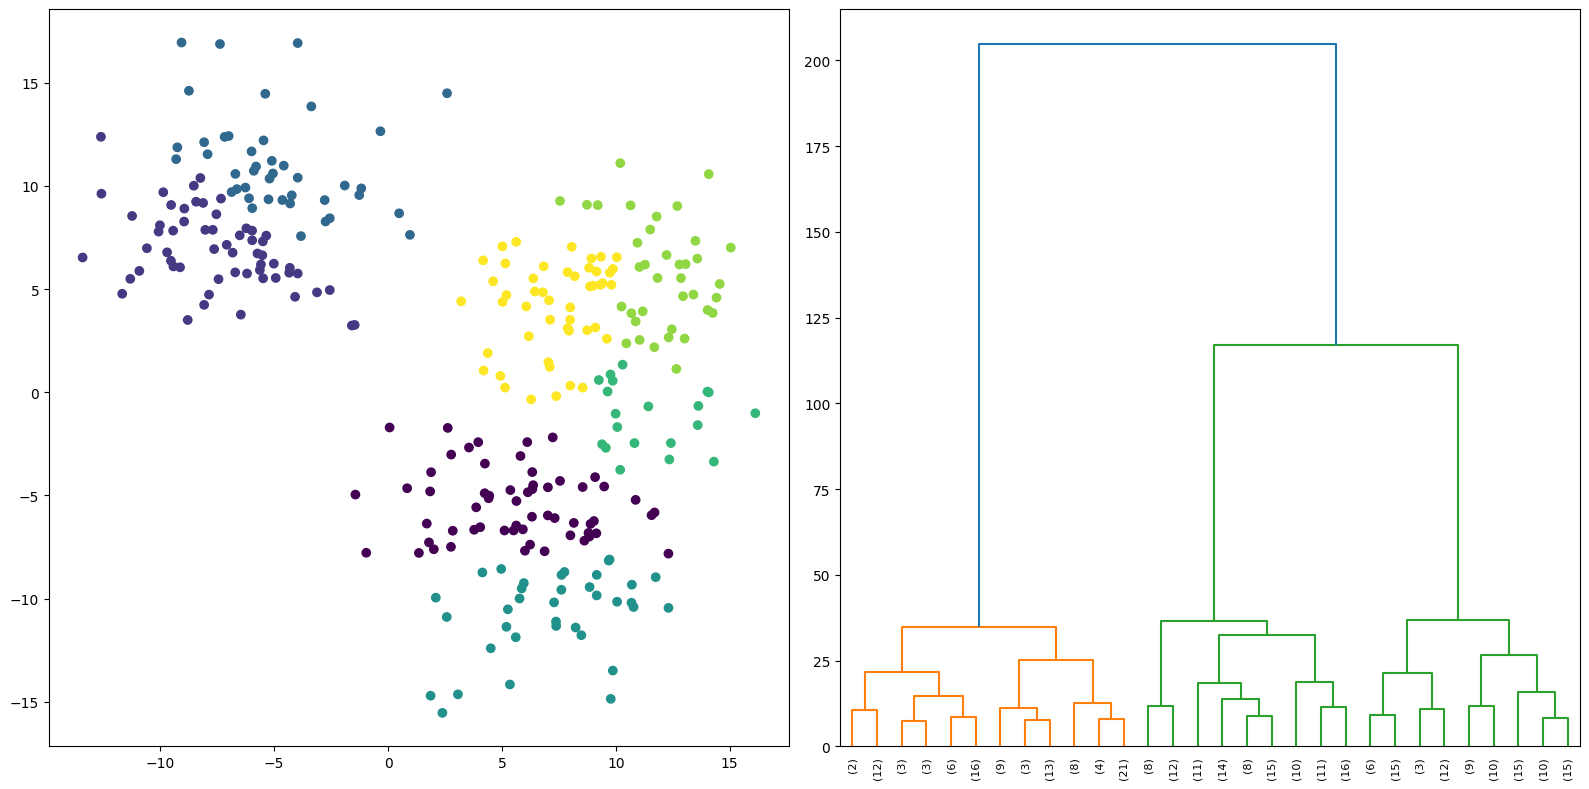

Clusters : 8 		 Silhouette score 0.3166436365031171 		  Davies-Bouldin Index 1.0280040546701077


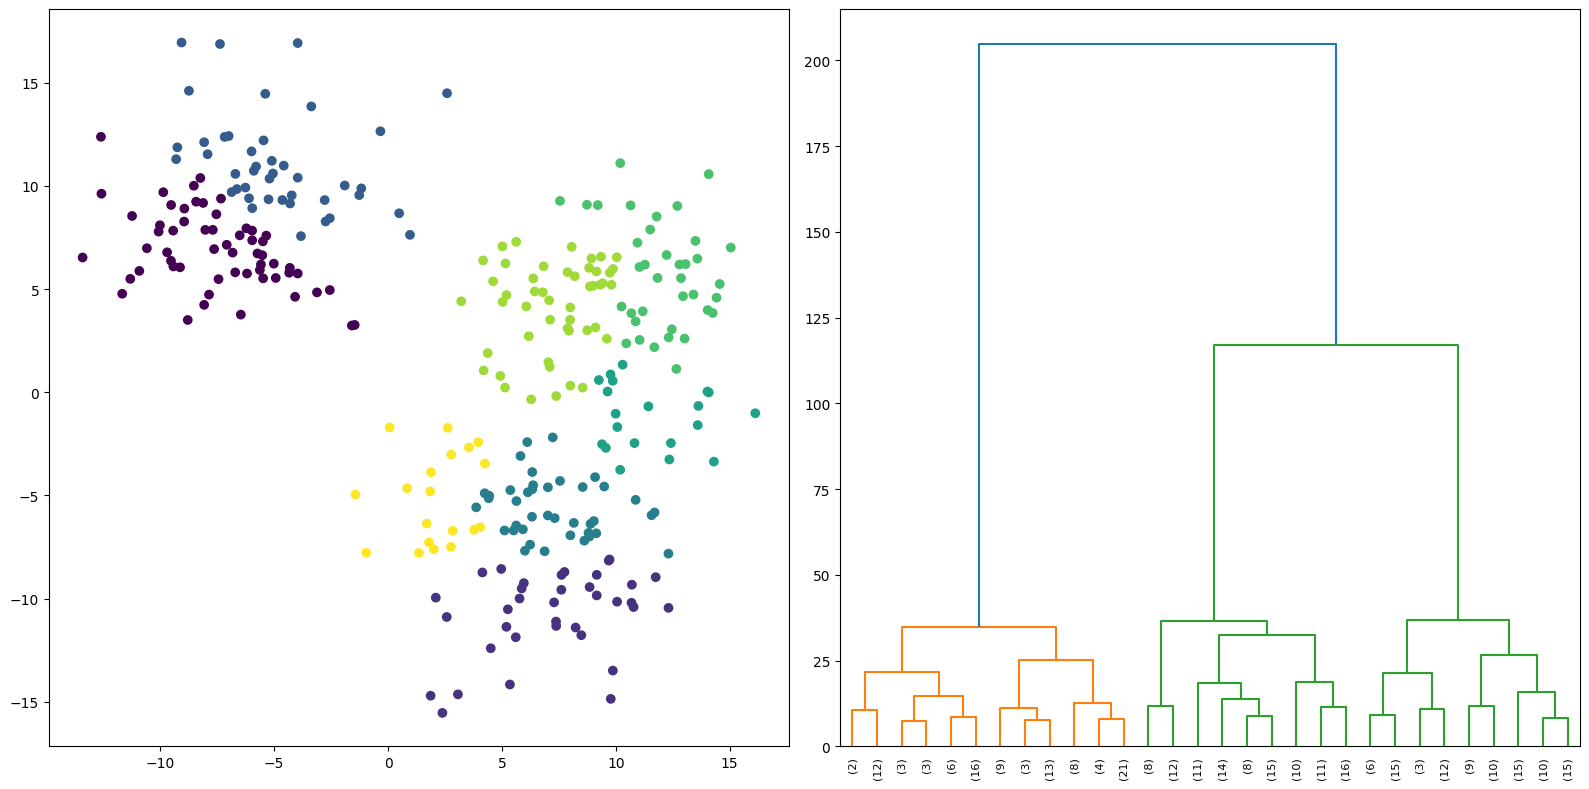

Clusters : 9 		 Silhouette score 0.3141054739888995 		  Davies-Bouldin Index 0.9590387479531339


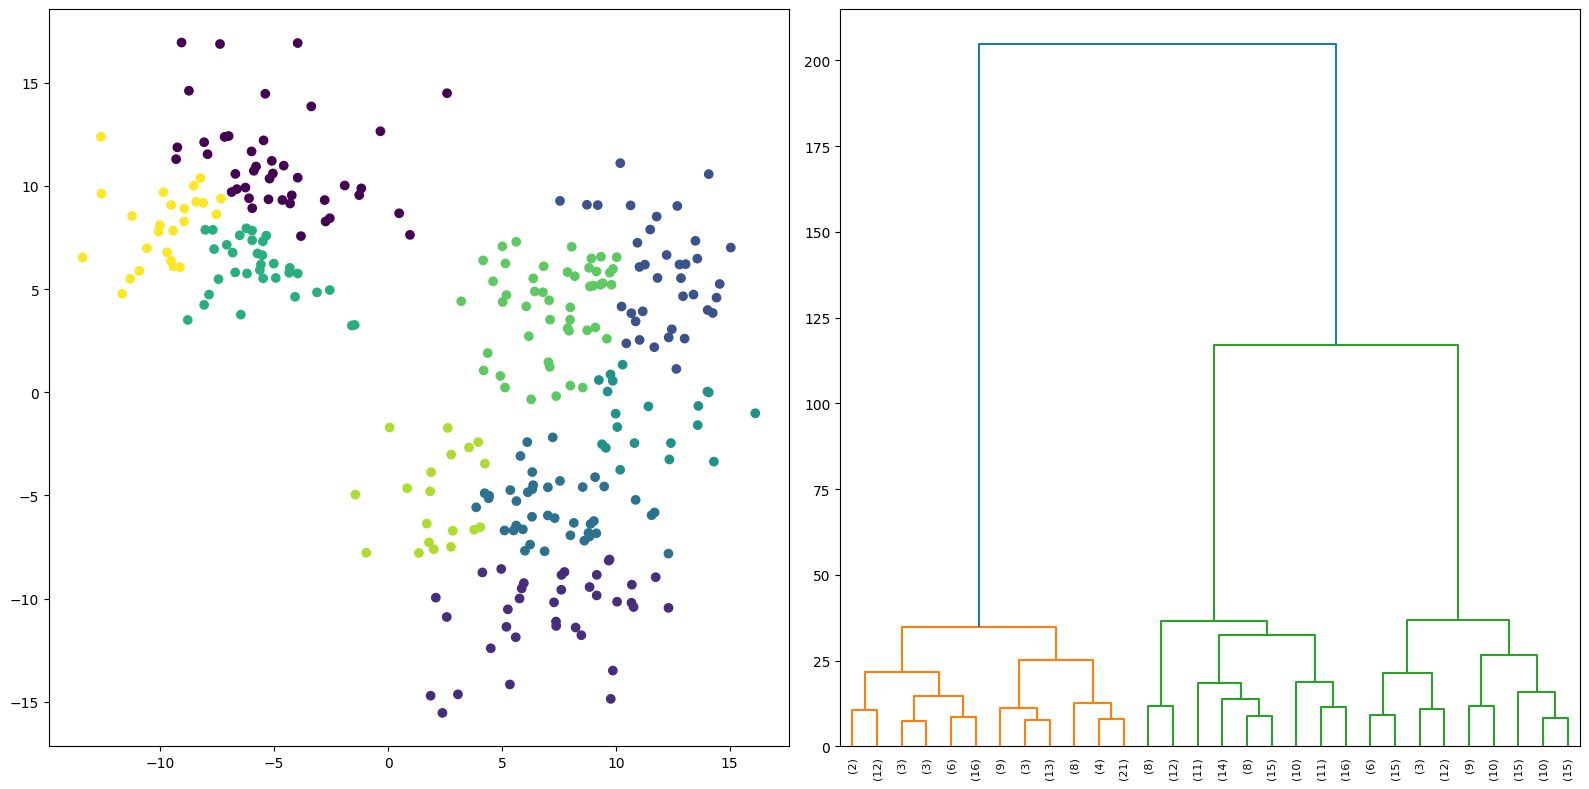

Clusters : 10 		 Silhouette score 0.3226506784665553 		  Davies-Bouldin Index 0.9399488577172755


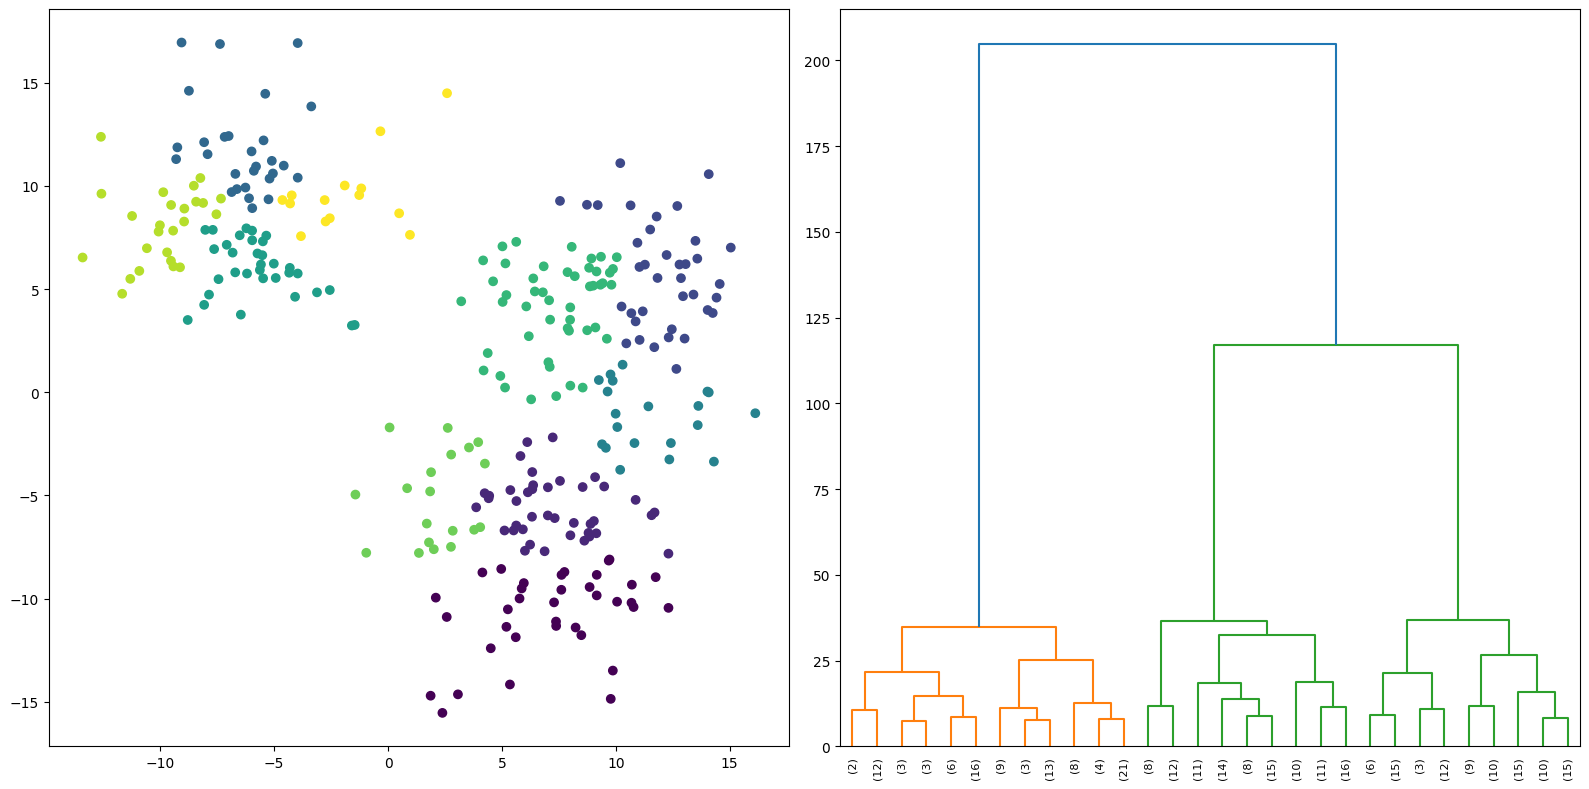

In [184]:
for k in range(2,11):

    aglc = AgglomerativeClustering(
    linkage = 'ward',
    n_clusters = k
    )
    
    y_pred = aglc.fit_predict(X)

    print(f'Clusters : {k} \t\t Silhouette score {silhouette_score(X,y_pred)} \t\t  Davies-Bouldin Index {davies_bouldin_score(X,y_pred)}')
    
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,8))

    ax1.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y_pred,
    )
    

    Z = sch.linkage(
        X,
        method = 'ward'
    )

    dend = sch.dendrogram(
        Z,
        leaf_font_size = 8,
        leaf_rotation = 90,
        truncate_mode = 'lastp',
        ax = ax2
    )

    plt.tight_layout()
    plt.show()
